In [1]:
import json
#import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

In [2]:
import nltk

In [3]:
!pip install nltk

## Tokenization and Stemming

In [4]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")
print(f)

<_io.TextIOWrapper name='reviewSamples20.json' mode='r' encoding='cp1252'>


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
!pip install numpy

In [7]:
# Select random review and business_id
m = randrange(len(data))
business_id_1 = data[m]['business_id']
business_id_1

'XTzKRvWciP_BZ9imk8mmPQ'

In [8]:
#Extract all the reviews and form a small dataset
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [9]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['i', 'tried', 'this', 'place', 'because', 'my', 'girls', 'are', 'away', 'for', 'a', 'month', 'and', 'i', 'really', 'wanted', 'to', 'try', 'to', 'wait', 'until', 'they', 'came', 'back', 'because', 'nobody', 'can', 'hold', 'a', 'candle', 'to', 'them', 'but', 'my', 'toes', 'were', 'desperate', 'when', 'i', 'went', 'in', 'they', 'were', 'almost', 'twice', 'what', 'i', 'usually', 'pay', 'to', 'begin', 'with', 'then', 'before', 'starting', 'the', 'pedicure', 'i', 'specifically', 'told', 'them', 'i', 'already', 'had', 'gel', 'polish', 'on', 'my', 'toes', 'they', 'did', "n't", 'tell', 'me', 'right', 'then', 'and', 'there', '``', 'that', 'will', 'be', 'an', 'extra', '5', 'no', 'they', 'waited', 'until', 'it', 'was', 'time', 'to', 'pay', 'and', 'not', 'only', 'charged', 'me', 'for', 'that', 'but', 'they', 'charged', 'me', 'all', 'kinds', 'of', 'extra', 'fees', 'that', 'i', 'did', "n't", 'even', 'ask', 'for', 'i', 'had', 'also', 'informed', 'the', 'girl', 'that', 'my', 'toenail', 'was', 'loose',

In [10]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['i', 'tri', 'thi', 'place', 'becaus', 'my', 'girl', 'are', 'away', 'for', 'a', 'month', 'and', 'i', 'realli', 'want', 'to', 'tri', 'to', 'wait', 'until', 'they', 'came', 'back', 'becaus', 'nobodi', 'can', 'hold', 'a', 'candl', 'to', 'them', 'but', 'my', 'toe', 'were', 'desper', 'when', 'i', 'went', 'in', 'they', 'were', 'almost', 'twice', 'what', 'i', 'usual', 'pay', 'to', 'begin', 'with', 'then', 'befor', 'start', 'the', 'pedicur', 'i', 'specif', 'told', 'them', 'i', 'alreadi', 'had', 'gel', 'polish', 'on', 'my', 'toe', 'they', 'did', "n't", 'tell', 'me', 'right', 'then', 'and', 'there', '``', 'that', 'will', 'be', 'an', 'extra', '5', 'no', 'they', 'wait', 'until', 'it', 'wa', 'time', 'to', 'pay', 'and', 'not', 'onli', 'charg', 'me', 'for', 'that', 'but', 'they', 'charg', 'me', 'all', 'kind', 'of', 'extra', 'fee', 'that', 'i', 'did', "n't", 'even', 'ask', 'for', 'i', 'had', 'also', 'inform', 'the', 'girl', 'that', 'my', 'toenail', 'wa', 'loos', 'and', 'need', 'glu', 'while', 'i', 'wa

In [11]:
#showing the word frequency distribution
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

i         18
a         10
my        10
and        9
me         8
          ..
fees       1
kinds      1
not        1
waited     1
money      1
Length: 170, dtype: int64

In [12]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

i        18
my       10
a        10
and       9
to        8
         ..
fee       1
kind      1
not       1
no        1
money     1
Length: 158, dtype: int64

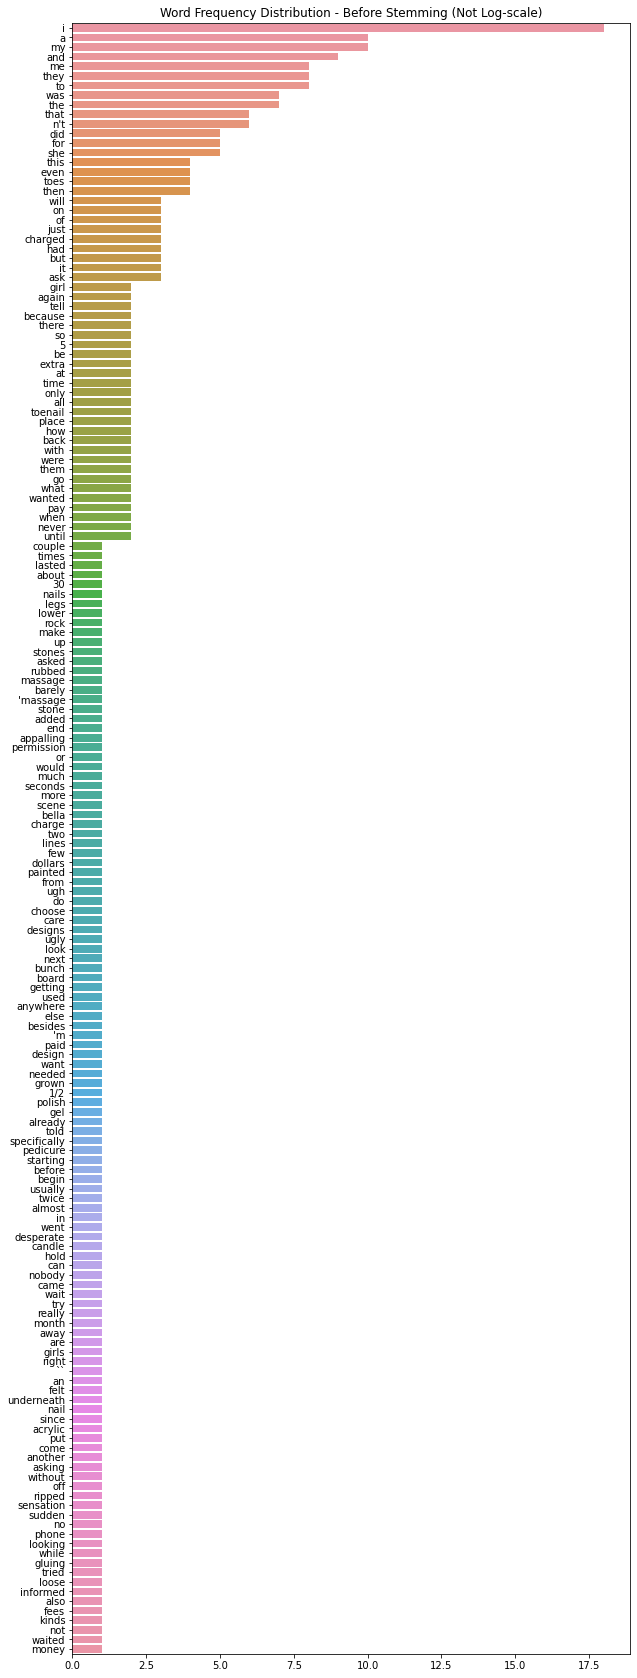

<Figure size 432x288 with 0 Axes>

In [13]:
#notice that this one does not work well on 've 
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()
plt.savefig('wordFreqBeforeStemming.png')

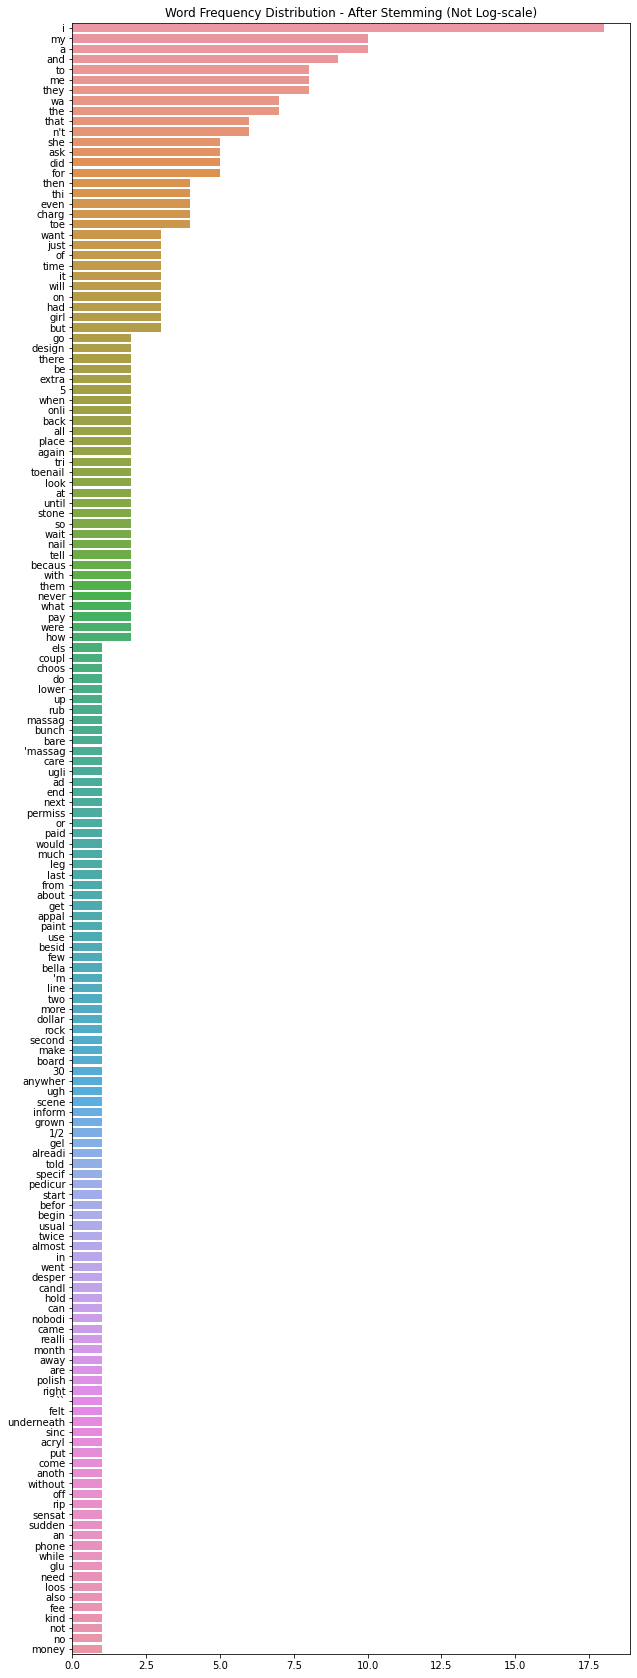

In [14]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

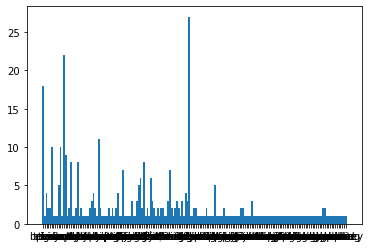

In [15]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

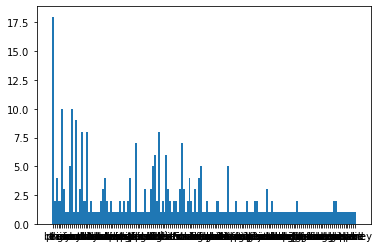

In [16]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [17]:
# Select a second random business
i = randrange(len(data))
business_id_2 = data[i]['business_id']
business_id_2

'CDpoJiqgM04wqQTZ6QkTqQ'

In [18]:
preStem_2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        words = word_tokenize(text)
        preStem_2.extend(words)

In [19]:
filtered_preStem_2 = [w for w in preStem_2 if not w in string.punctuation]
# Stemming
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [20]:
freq_dist_2 = FreqDist(filtered_preStem_2)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)
freq_dist_2

no            3
love          1
while         1
cared         1
have          1
could         1
they          1
and           1
out           1
walked        1
we            1
water         1
menu          1
us            1
ignored       1
bartender     1
min           1
this          1
10            1
for           1
bar           1
at            1
sat           1
manners       1
has           1
location      1
scottsdale    1
the           1
but           1
downtown      1
place         1
less          1
dtype: int64

In [21]:
stemmed_freq_dist_2 = FreqDist(stems_2)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist_2

no           3
love         1
while        1
care         1
have         1
could        1
they         1
and          1
out          1
walk         1
we           1
water        1
menu         1
us           1
ignor        1
bartend      1
min          1
thi          1
10           1
for          1
bar          1
at           1
sat          1
manner       1
ha           1
locat        1
scottsdal    1
the          1
but          1
downtown     1
place        1
less         1
dtype: int64

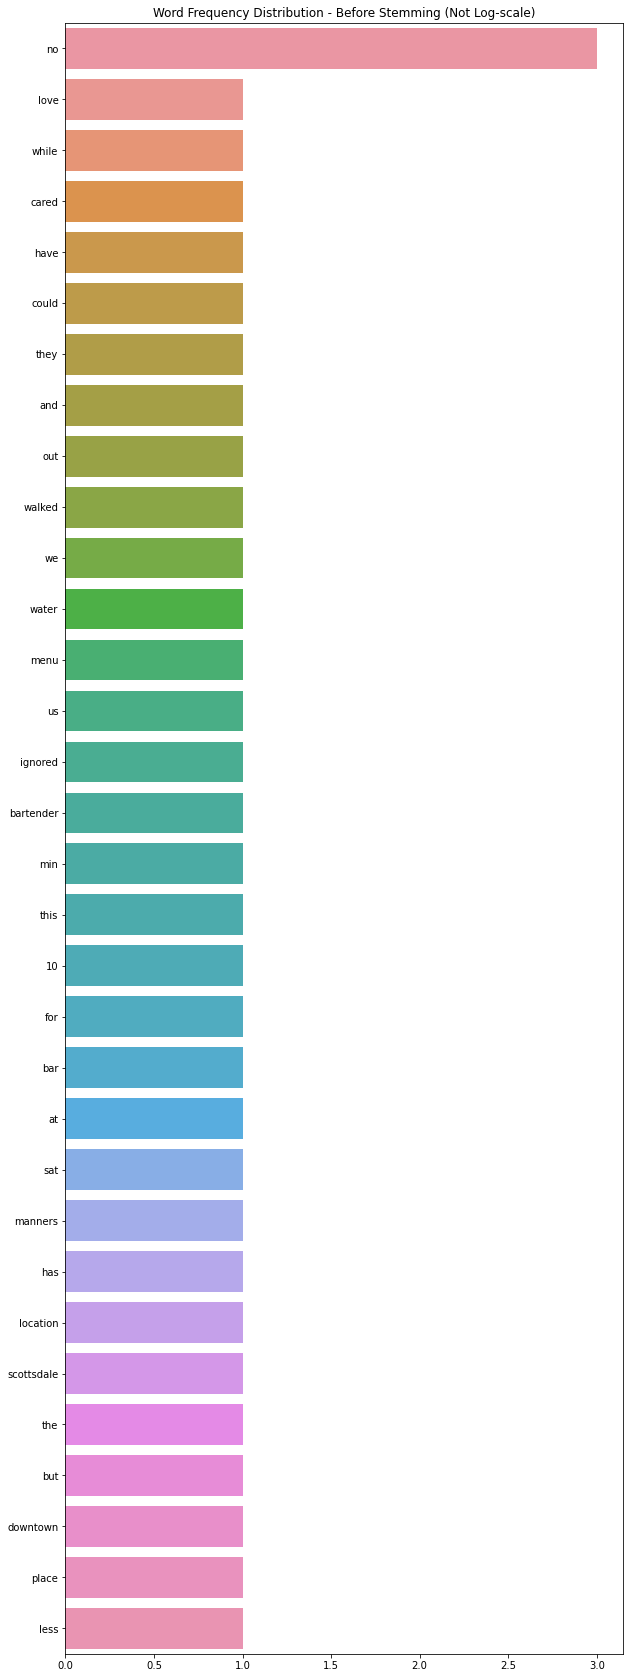

In [22]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist_2.values, y=freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

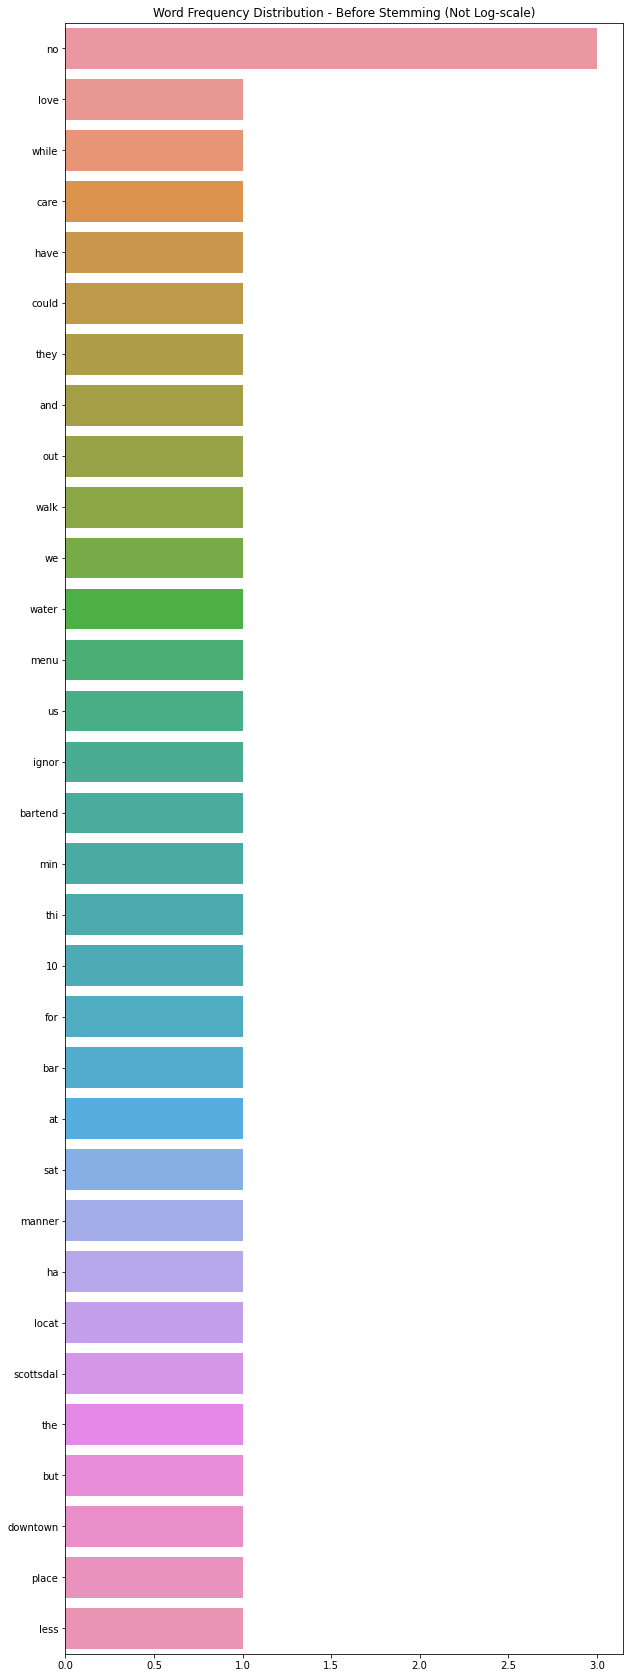

In [23]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist_2.values, y=stemmed_freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

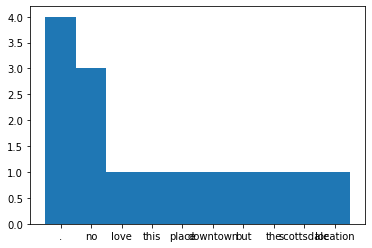

In [24]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

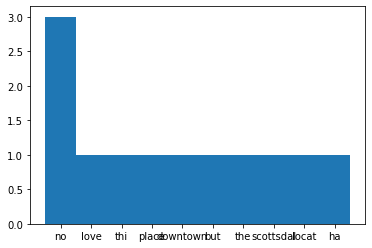

In [25]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

Remove Stopwords - Ideally we want to remove stopwords before stemming

In [26]:
sw = stopwords.words('english')

In [27]:
# Business id 1
# Remove stop words
filtered_preStem = [w for w in filtered_preStem if not w in sw]
stems = [ps.stem(w) for w in filtered_preStem]

In [28]:
freq_dist = FreqDist(filtered_preStem).most_common(10)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)

In [29]:
stemmed_freq_dist = FreqDist(stems).most_common(10)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)

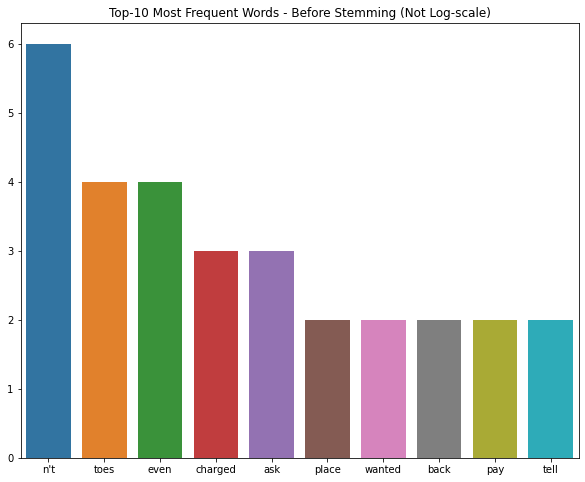

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

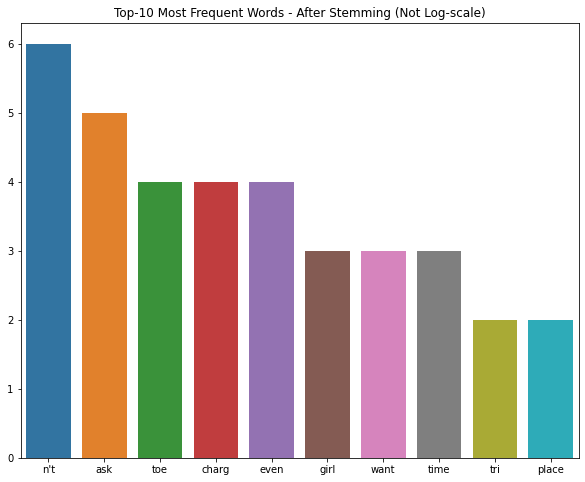

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist.index, y=stemmed_freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - After Stemming (Not Log-scale)")
plt.show()

In [32]:
# Repeat for business id 2
# Remove stop words
filtered_preStem_2 = [w for w in filtered_preStem_2 if not w in sw]
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [33]:
freq_dist_2 = FreqDist(filtered_preStem_2).most_common(10)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)

In [34]:
stemmed_freq_dist_2 = FreqDist(stems_2).most_common(10)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)

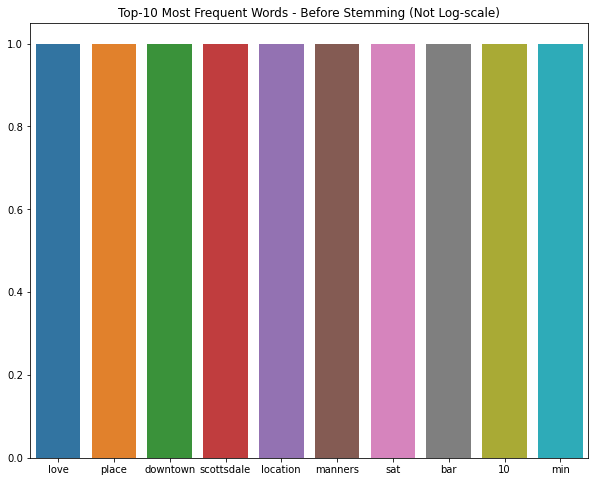

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist_2.index, y=freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

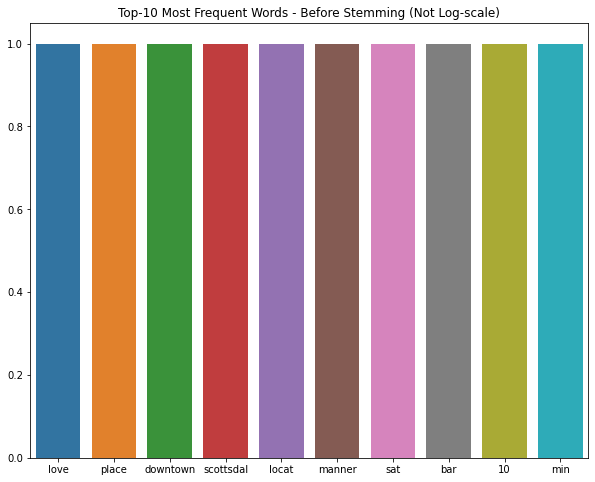

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist_2.index, y=stemmed_freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

## POS Tagging

In [37]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

["I'll be the first to admit that I was not excited about going to La Tavolta.", 'Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.', 'Im also not big on ordering pasta when I go out.', 'Alas, I was outnumbered.', 'Thank goodness!', 'I ordered the sea bass special.', 'It was to die for.', 'Cooked perfectly, seasoned perfectly, perfect portion.', 'I can not say enough good things about this dish.', 'When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?"', 'She does.', 'My hubby got the crab tortellini and also loved his.', 'I heard "mmmm this is so good" from all around the table.', 'Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant.', "Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversa

In [39]:
nlp = spacy.load("en_core_web_sm")

In [40]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [41]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

Sentence 1: 
Word            NLTK POS Tag    REGREX POS TAG  spaCy POS TAG  
My              PRP$            NN              PRP$           
friends         NNS             NNS             NNS            
and             CC              NN              CC             
I               PRP             NN              PRP            
have            VBP             NN              VB             
ordered         VBN             VBD             VBD            
the             DT              NN              DT             
brisket         NN              NN              NN             
,               ,               NN              ,              
the             DT              NN              DT             
catfish         NN              NN              NN             
,               ,               NN              ,              
the             DT              NN              DT             
veggie          NN              NN              NN             
burger          NN         

## Writing Style


### Articles Chosen: 

*Channel News Asia*
> 1. https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496
2. https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

*Stackoverflow*
>1. https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function
2. https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

*HardwareZone*
>1. https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/
2. https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

---

In [42]:
# returns (number of non capitalised proper nouns, total number of proper nouns)
def checkProperNounCapitalised(text, nlp):
    count = 0
    not_capitalised = 0
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "PROPN":
            count += 1
            if not token.text[0].isupper():
                not_capitalised += 1
    return (not_capitalised, count)

In [43]:
def checkFirstWordCapitalised(text):
    punctuations = '''!()-[]{};:'"“”‘’\,<>./?@#$%^&*_~'''
    
    count = 0
    sentences = nltk.tokenize.sent_tokenize(text)
    for sentence in sentences:
        no_punct = ""
        for char in sentence:
           if char not in punctuations:
               no_punct = no_punct + char
        if no_punct[0].isupper():
            count += 1
    return (count, len(sentences))

In [44]:
# stemming
def q3_stem(text):
    overflow_prestem = []
    word = word_tokenize(text)
    overflow_prestem.extend(word)
    filtered_overflow_preStem = [w for w in overflow_prestem if not w in string.punctuation]
    return filtered_overflow_preStem

In [48]:
## Language checking function (CNA)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i].text
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)
    
## Language checking function (StackOverflow)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_so(data):
    totalerrors = 0
    wordcount = 0

    for i in range(len(data)):
        test_sentence = data[i]
        wordcount += len(test_sentence)
        matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
        totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

## Language checking function (Hardware Zone)
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
def check_language_error_hwz(data):
    totalerrors = 0
    wordcount = 0

    test_sentence = data
    wordcount += len(test_sentence)
    matches = tool.check(test_sentence)
    #     for i in range(len(matches)):
    #         print(matches[i])
    totalerrors = len(matches) + totalerrors
    print("Number of errors = ",totalerrors)
    print("Number of words = ",wordcount)
    # Percentage of language error among all words
    language_error_percentage = (totalerrors/wordcount)*100
    print("Percentage of language error = ",language_error_percentage)

In [49]:
import requests
from bs4 import BeautifulSoup

# scrape post from CNA
def scrape_text_CNA(website):
    site = requests.get(website)
    
    content = BeautifulSoup(site.content, 'html.parser')
    post = content.select('div.text-long p')
    return post

# scrape post from Stackoverflow
def scrape_text_stackoverflow(website):
    site = requests.get(website)
        
    content = BeautifulSoup(site.content, 'html.parser')
    questions = content.select('div.s-prose.js-post-body p')
    return questions

# scrape code from Stackoverflow
def scrape_code_stackoverflow(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    code = content.select('div.s-prose.js-post-body pre code')
    return code

# scrape post from HardwareZone
def scrape_text_hardwarezone(website):
    site = requests.get(website)
    content = BeautifulSoup(site.content, 'html.parser')
    for script in content(["script", "style"]):
        script.extract()
    wrap = content.select('article.message-body.js-selectToQuote div.bbWrapper')
    return wrap[0].text

##### CNA #1

Article Name: ‘With school counsellors, it’s really hit-or-miss’: Behind the challenge of safeguarding student mental health

Website: https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496

In [50]:
# need to load article before running function
cna1 = scrape_text_CNA('https://www.channelnewsasia.com/cnainsider/school-counselling-challenge-safeguard-student-mental-health-2081496')
for i in range(len(cna1)):
    print(cna1[i].text)
    print('\n')

* denotes name changed to protect the person’s identity


SINGAPORE: When Jane* opened up to her secondary school counsellor about the cold wars and troubles she was having with some close friends, she was told that “life’s like that”.


That was the then 14-year-old’s first session.


“I felt ignored, like (school counselling is hopeless) even if I bring up my problems,” said Jane, now 17 and in her first year at junior college.


She had been “mandated” to attend counselling because she was frequently late for class and did not submit homework on time. She recalled her form teacher telling her outside the classroom, in full view and within earshot of her classmates, that a session had been arranged to address her tardiness.


“It brings the idea that those who aren’t faring well have some problems and need to see the counsellor, rather than (the idea that) people … want to see a counsellor because of personal reasons,” she said.


After three compulsory sessions on her time managemen

In [51]:
check_language_error(cna1)

Number of errors =  164
Number of words =  31856
Percentage of language error =  0.5148166750376695


In [52]:
caps_cna_1 = []
total_count_cna1 = 0
total_numSentences_cna1 = 0

for i in range(len(cna1)):
    caps_cna_1 += [cna1[i].text]

for i in range(len(caps_cna_1)):
    (count, numSentences) = checkFirstWordCapitalised(caps_cna_1[i])
    total_count_cna1 += count
    total_numSentences_cna1 += numSentences

print("Total count of capitalised first words: ", total_count_cna1)
print("Total number of sentences: ", total_numSentences_cna1)
print("Percentage: ", (total_count_cna1/total_numSentences_cna1) * 100)

# analysis: first sentence - caption


Total count of capitalised first words:  264
Total number of sentences:  268
Percentage:  98.50746268656717


In [53]:
pronoun_cna1 = []
pronoun_count_cna1 = 0
total_pronoun_cna1 = 0

for i in range(len(cna1)):
    pronoun_cna1 += [cna1[i].text]

for i in range(len(pronoun_cna1)):
    (count, numSentences) = checkProperNounCapitalised(pronoun_cna1[i], nlp)
    pronoun_count_cna1 += count
    total_pronoun_cna1 += numSentences

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna1)
print("Total number of pronouns: ", total_pronoun_cna1)
print("Percentage: ", (pronoun_count_cna1/total_pronoun_cna1) * 100)

Total count of non-capitalised capitalised pronouns:  3
Total number of pronouns:  216
Percentage:  1.3888888888888888


##### CNA #2

Article Name: Commentary: China's smackdown on corporate giants may be a start of national rebuilding

Website: https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091

In [59]:
# need to load article before running function
cna2 = scrape_text_CNA('https://www.channelnewsasia.com/commentary/china-ant-group-alibaba-didi-crackdown-tech-ipo-2149091')
for i in range(len(cna2)):
    print(cna2[i].text)
    print('\n')

BANGKOK: In recent years, China’s digital economy has seemed like a house undergoing full-scale renovation. At this moment, it appears to be in the demolition stage.


In a series of regulatory smackdowns, the magnitude ranging from sledgehammers to wrecking balls, Beijing has appeared willing to lay waste to entire industries and billion-dollar firms in the interest of rebuilding much of the country’s technology and Internet sectors to align with its objectives.


Thus far, casualties have included Ant Group, whose planned initial public offering (IPO) in November 2020 was set to be the largest in history until authorities slammed the brakes and imposed rules forcing the fintech giant to restructure much of its business. 


After the ride-hailing company Didi Global reportedly ignored warnings not to go through with its June public offering in the United States, Beijing responded swiftly with a thorough probe of the firm’s data security practices, ordering the removal of Didi apps and

In [60]:
check_language_error(cna2)

Number of errors =  24
Number of words =  6902
Percentage of language error =  0.34772529701535787


In [61]:
caps_cna_2 = []
total_count_cna2 = 0
total_numSentences_cna2 = 0

for i in range(len(cna2)):
    caps_cna_2 += [cna2[i].text]

for i in range(len(caps_cna_2)):
    (count_cna2, numSentences_cna2) = checkFirstWordCapitalised(caps_cna_2[i])
    total_count_cna2 += count_cna2
    total_numSentences_cna2 += numSentences_cna2

print("Total count of capitalised first words: ", total_count_cna2)
print("Total number of sentences: ", total_numSentences_cna2)
print("Percentage: ", (total_count_cna2/total_numSentences_cna2) * 100)

Total count of capitalised first words:  38
Total number of sentences:  38
Percentage:  100.0


In [62]:
pronoun_cna2 = []
pronoun_count_cna2 = 0
total_pronoun_cna2 = 0

for i in range(len(cna2)):
    pronoun_cna2 += [cna2[i].text]

for i in range(len(pronoun_cna2)):
    (count_cna2, numSentences_cna2) = checkProperNounCapitalised(pronoun_cna2[i], nlp)
    pronoun_count_cna2 += count_cna2
    total_pronoun_cna2 += numSentences_cna2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_cna2)
print("Total number of pronouns: ", total_pronoun_cna2)
print("Percentage: ", (pronoun_count_cna2/total_pronoun_cna2) * 100)

Total count of non-capitalised capitalised pronouns:  1
Total number of pronouns:  82
Percentage:  1.2195121951219512


##### StackOverflow #1

Post Name: flutter app and woocommerce integration (add to cart function)

Website: https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function

In [63]:
# Scraping of Post Text
soText_1 = scrape_text_stackoverflow('https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function')
for i in range(len(soText_1)):
    print(soText_1[i].text)
    print('\n')

i am trying to create flutter app with rest API to connect with woocommerce website.
i modified the class-wc-rest-webhooks.php file so both website and flutter app can show the same data inside the cart(for example; i add 1 item to cart in website, then in flutter app also show 1 item inside my cart). however after i modified the class-wc-rest-webhooks.php file, my wordpress website become error with "There has been a critical error on this website." error message.


this is my code in the class-wc-rest-webhooks.php file


please help me to solve this issue.
thank you




In [64]:
check_language_error(soText_1)

Number of errors =  13
Number of words =  568
Percentage of language error =  2.2887323943661975


In [65]:
caps_so_1 = []
total_count_so1 = 0
total_numSentences_so1 = 0

for i in range(len(soText_1)):
    caps_so_1 += [soText_1[i].text]

for i in range(len(caps_so_1)):
    (count_so1, numSentences_so1) = checkFirstWordCapitalised(caps_so_1[i])
    total_count_so1 += count_so1
    total_numSentences_so1 += numSentences_so1

print("Total count of capitalised first words: ", total_count_so1)
print("Total number of sentences: ", total_numSentences_so1)
print("Percentage: ", (total_count_so1/total_numSentences_so1) * 100)

Total count of capitalised first words:  0
Total number of sentences:  7
Percentage:  0.0


In [66]:
pronoun_so1 = []
pronoun_count_so1 = 0
total_pronoun_so1 = 0

for i in range(len(soText_1)):
    pronoun_so1 += [soText_1[i].text]

for i in range(len(pronoun_so1)):
    (count_so1, numSentences_so1) = checkProperNounCapitalised(pronoun_so1[i], nlp)
    pronoun_count_so1 += count_so1
    total_pronoun_so1 += numSentences_so1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so1)
print("Total number of pronouns: ", total_pronoun_so1)
print("Percentage: ", (pronoun_count_so1/total_pronoun_so1) * 100)

Total count of non-capitalised capitalised pronouns:  1
Total number of pronouns:  2
Percentage:  50.0


In [67]:
# Scraping of Whole Code
soCodeWhole_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function')
for i in range(len(soCodeWhole_1)):
    print(soCodeWhole_1[i].text)
    print('\n')

<?php
 /**
 * REST API Webhooks controller
  *
 * Handles requests to the /webhooks endpoint.
 *
 * @package Automattic/WooCommerce/RestApi
 * @since   2.6.0
 */

 defined( 'ABSPATH' ) || exit;

 /**
 * REST API Webhooks controller class.
 *
 * @package Automattic/WooCommerce/RestApi
 * @extends WC_REST_Webhooks_V2_Controller
 */
 class WC_REST_Webhooks_Controller extends WC_REST_Webhooks_V2_Controller {

   /**
    * Endpoint namespace.
    *
    * @var string
    */
    protected $namespace = 'wc/v3';

   /**
    * Get the default REST API version.
    *
    * @since  3.0.0
    * @return string
    */
    protected function get_default_api_version() {
       return 'wp_api_v3';
    }

 protected $rest_base = 'custom';

 function woocomm_add_to_cart($param) {

    global $wpdb;
    $user_id = $param['user_id'];
    wp_set_current_user($user_id);

    $objProduct = new WC_Session_Handler();     
    $wc_session_data = $objProduct->get_session($user_id);
    
     // Get the persistent 

In [68]:
# Getting stem
for i in range(len(soCodeWhole_1)):
    codeStem_1 = q3_stem(soCodeWhole_1[i].text)
    print(codeStem_1)

['php', 'REST', 'API', 'Webhooks', 'controller', 'Handles', 'requests', 'to', 'the', '/webhooks', 'endpoint', 'package', 'Automattic/WooCommerce/RestApi', 'since', '2.6.0', 'defined', "'ABSPATH", '||', 'exit', 'REST', 'API', 'Webhooks', 'controller', 'class', 'package', 'Automattic/WooCommerce/RestApi', 'extends', 'WC_REST_Webhooks_V2_Controller', 'class', 'WC_REST_Webhooks_Controller', 'extends', 'WC_REST_Webhooks_V2_Controller', 'Endpoint', 'namespace', 'var', 'string', 'protected', 'namespace', "'wc/v3", 'Get', 'the', 'default', 'REST', 'API', 'version', 'since', '3.0.0', 'return', 'string', 'protected', 'function', 'get_default_api_version', 'return', "'wp_api_v3", 'protected', 'rest_base', "'custom", 'function', 'woocomm_add_to_cart', 'param', 'global', 'wpdb', 'user_id', 'param', "'user_id", 'wp_set_current_user', 'user_id', 'objProduct', 'new', 'WC_Session_Handler', 'wc_session_data', 'objProduct-', 'get_session', 'user_id', '//', 'Get', 'the', 'persistent', 'cart', 'may', 'be',

In [69]:
check_language_error(soCodeWhole_1)

Number of errors =  503
Number of words =  7177
Percentage of language error =  7.008499372997074


In [70]:
# Scraping of Post Code Comments
import re
soCode_1 = scrape_code_stackoverflow('https://stackoverflow.com/questions/69235547/flutter-app-and-woocommerce-integration-add-to-cart-function')
comments_1 = []
for i in range(len(soCode_1)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_1[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_1.append(space_cleaned)
for c in range(len(comments_1)):
    print(comments_1[c])
    print("\n")

 REST API Webhooks controller Handles requests to the /webhooks endpoint. @package Automattic/WooCommerce/RestApi @since 2.6.0 


 REST API Webhooks controller class. @package Automattic/WooCommerce/RestApi @extends WC_REST_Webhooks_V2_Controller 


 Endpoint namespace. @var string 


 Get the default REST API version. @since 3.0.0 @return string 


 Get the persistent cart may be _woocommerce_persistent_cart can be in your case check 


 WC 3.6+ - Cart and other frontend functions are not included for REST requests.


 We need to force a refresh of the cart contents from session here (cart contents are normally refreshed on wp_loaded, which has already happened by this point).


 create new Cart Object


 Add old cart data to newly created cart object


 Add product and quantities coming in request to the new cart object


 If there is a current session cart, overwrite it with the new cart


 Update the wp_session table with updated cart data


 Execute the query


 Overwrite the pers

In [71]:
check_language_error_so(comments_1)

Number of errors =  22
Number of words =  1100
Percentage of language error =  2.0


##### StackOverflow #2

Post Name: Debugging error org.apache.axis2.AxisFault: Connection or outbound has closed, the trustAnchors parameter must be non-empty

Website: https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t

In [72]:
# Scraping Post Text
soText_2 = scrape_text_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soText_2)):
    print(soText_2[i].text)
    print('\n')

We are facing trouble trying to connect to a web service using Netbeans with Java OpenJDK 14 and Apache Tomcat 9. It's a specific environment which requires Axis2 1.6.2 library to connect to WSDL via SSL certificate trusted with keytool. We changed Axis2 to 1.7.9 without success.


We get the following error:


We tried to test a java main class with the following code:


However, the line which throws error is the last one:


Firewall rules are open and the web service allows connection to a list of IP Addresses. Our IP is allowed to connect so any ideas on how can we debug this error please? We think the connection to the web service is being rejected but we are not sure.


EDIT: After following suggestion from comment, it turned out it may be a problem with SSL certificate, since using jvm parameter


revealed the following error:


We are using keytool with OpenJDK 14 as follows:


The keystore is generated automatically with the line above. An organization for finding people info 

In [73]:
check_language_error(soText_2)

Number of errors =  16
Number of words =  1864
Percentage of language error =  0.8583690987124464


In [74]:
caps_so_2 = []
total_count_so2 = 0
total_numSentences_so2 = 0

for i in range(len(soText_2)):
    caps_so_2 += [soText_2[i].text]

for i in range(len(caps_so_2)):
    (count_so2, numSentences_so2) = checkFirstWordCapitalised(caps_so_2[i])
    total_count_so2 += count_so2
    total_numSentences_so2 += numSentences_so2

print("Total count of capitalised first words: ", total_count_so2)
print("Total number of sentences: ", total_numSentences_so2)
print("Percentage: ", (total_count_so2/total_numSentences_so2) * 100)

Total count of capitalised first words:  25
Total number of sentences:  26
Percentage:  96.15384615384616


In [75]:
pronoun_so2 = []
pronoun_count_so2 = 0
total_pronoun_so2 = 0

for i in range(len(soText_2)):
    pronoun_so2 += [soText_2[i].text]

for i in range(len(pronoun_so2)):
    (count_so2, numSentences_so2) = checkProperNounCapitalised(pronoun_so2[i], nlp)
    pronoun_count_so2 += count_so2
    total_pronoun_so2 += numSentences_so2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_so2)
print("Total number of pronouns: ", total_pronoun_so2)
print("Percentage: ", (pronoun_count_so2/total_pronoun_so2) * 100)

Total count of non-capitalised capitalised pronouns:  4
Total number of pronouns:  16
Percentage:  25.0


In [76]:
# Scraping of Whole Code
soCodeWhole_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
for i in range(len(soCodeWhole_2)):
    print(soCodeWhole_2[i].text)
    print('\n')

org.apache.axis2.AxisFault: Connection or outbound has closed
org.apache.axis2.AxisFault.makeFault(AxisFault.java:430)
org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo(SOAPMessageFormatter.java:78)
org.apache.axis2.transport.http.AxisRequestEntity.writeRequest(AxisRequestEntity.java:84)

com.ctc.wstx.exc.WstxIOException: Connection or outbound has closed
    com.ctc.wstx.sw.BaseStreamWriter.finishDocument(BaseStreamWriter.java:1687)
    com.ctc.wstx.sw.BaseStreamWriter.close(BaseStreamWriter.java:288)
    org.apache.axiom.om.impl.MTOMXMLStreamWriter.close(MTOMXMLStreamWriter.java:222)
    org.apache.axiom.om.impl.llom.OMSerializableImpl.serializeAndConsume(OMSerializableImpl.java:192)
    org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo(SOAPMessageFormatter.java:74)
    org.apache.axis2.transport.http.AxisRequestEntity.writeRequest(AxisRequestEntity.java:84)

java.net.SocketException: Connection or outbound has closed
    java.base/sun.security.ssl.SSLSocketImpl

In [77]:
# Getting stem
codeStem_2_final = []
for i in range(len(soCodeWhole_2)):
    codeStem_2 = q3_stem(soCodeWhole_2[i].text)
    codeStem_2_final += codeStem_2
    
codeStem_2_final

['org.apache.axis2.AxisFault',
 'Connection',
 'or',
 'outbound',
 'has',
 'closed',
 'org.apache.axis2.AxisFault.makeFault',
 'AxisFault.java:430',
 'org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo',
 'SOAPMessageFormatter.java:78',
 'org.apache.axis2.transport.http.AxisRequestEntity.writeRequest',
 'AxisRequestEntity.java:84',
 'com.ctc.wstx.exc.WstxIOException',
 'Connection',
 'or',
 'outbound',
 'has',
 'closed',
 'com.ctc.wstx.sw.BaseStreamWriter.finishDocument',
 'BaseStreamWriter.java:1687',
 'com.ctc.wstx.sw.BaseStreamWriter.close',
 'BaseStreamWriter.java:288',
 'org.apache.axiom.om.impl.MTOMXMLStreamWriter.close',
 'MTOMXMLStreamWriter.java:222',
 'org.apache.axiom.om.impl.llom.OMSerializableImpl.serializeAndConsume',
 'OMSerializableImpl.java:192',
 'org.apache.axis2.transport.http.SOAPMessageFormatter.writeTo',
 'SOAPMessageFormatter.java:74',
 'org.apache.axis2.transport.http.AxisRequestEntity.writeRequest',
 'AxisRequestEntity.java:84',
 'java.net.SocketExce

In [78]:
check_language_error(soCodeWhole_2)

Number of errors =  172
Number of words =  2796
Percentage of language error =  6.151645207439199


In [79]:
# Scraping of Post Code Comments
soCode_2 = scrape_code_stackoverflow('https://stackoverflow.com/questions/65907012/debugging-error-org-apache-axis2-axisfault-connection-or-outbound-has-closed-t')
comments_2 = []
for i in range(len(soCode_2)):
    pattern = re.compile('(?:/\*(.*?)\*/)|(?://(.*?)\n)',re.S)
    comment = pattern.findall(soCode_2[i].text)
    for x in range(len(comment)):
        for y in range(len(comment[0])):
            star_cleaned = re.sub(r'[*]', '', comment[x][y])
            space_cleaned = re.sub(r'[\n ]+', ' ', star_cleaned)
            if space_cleaned != "":
                comments_2.append(space_cleaned)
for c in range(len(comments_2)):
    print(comments_2[c])
    print("\n")

 Generate curp


services.wserv.ecurp.dgti.segob.gob.mx", "consultarCurpDetalle");




In [80]:
check_language_error_so(comments_2)

Number of errors =  12
Number of words =  79
Percentage of language error =  15.18987341772152


##### HardwareZone #1

Post Name: Beginner's Bible To Bodybuilding/Supplements/Fat-Loss ( Newbies Pls Read!!!)

Website: https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/

In [81]:
# Scraping data from HardwareZone
hwz_1 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/beginners-bible-to-bodybuilding-supplements-fat-loss-newbies-pls-read.3419226/')
print(hwz_1)

This is a monster thread of our old stickies you can find here:
A Beginner's Guide To Bodybuilding ( Newbies Pls Read!!!)
Beginner's Guide To Supplements( Newbies Pls Read!!!)
Beginners' Guide to Fat Loss / Q&A / FAQ

To jump to Beginnger's Bible to Supplements in this thread, click here.
To jump to Beginner's Bible to Fat-Loss, click here.

Credit goes to galapogos and rockstarz.




Beginner's Bible To Bodybuilding
Basic Nutrition

It's quite well known that nutrition is one of, if not the, most important factors of bodybuilding. I'd like to give a basic breakdown of some of the more basic aspects that everyone should be aware of.

As for a very basic breakdowns, all food consist of: carbs, proteins, and fats. Again...this is on a very basic level (as it all gets much more complex).

Protien (4 calories/gram) - Protien is the building block of muscle, so it's no wonder why bodybuilders are recomended to take in 1-1.5g/lb of bodyweight....minimum. There has been a debate that has stil

In [82]:
check_language_error_hwz(hwz_1)

Number of errors =  75
Number of words =  7260
Percentage of language error =  1.0330578512396695


In [83]:
total_count_hwz1 = 0
total_numSentences_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkFirstWordCapitalised(hwz_1)
total_count_hwz1 += count_hwz1
total_numSentences_hwz1 += numSentences_hwz1

print("Total count of capitalised first words: ", total_count_hwz1)
print("Total number of sentences: ", total_numSentences_hwz1)
print("Percentage: ", (total_count_hwz1/total_numSentences_hwz1) * 100)

Total count of capitalised first words:  50
Total number of sentences:  55
Percentage:  90.9090909090909


In [84]:
pronoun_count_hwz1 = 0
total_pronoun_hwz1 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_1, nlp)    
pronoun_count_hwz1 += count_hwz1
total_pronoun_hwz1 += numSentences_hwz1

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz1)
print("Total number of pronouns: ", total_pronoun_hwz1)
print("Percentage: ", (pronoun_count_hwz1/total_pronoun_hwz1) * 100)

Total count of non-capitalised capitalised pronouns:  8
Total number of pronouns:  54
Percentage:  14.814814814814813


##### HardwareZone #2

Post Name: Need advice. No internet for desktop on Singtel fibre

Website: https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/

In [85]:
hwz_2 = scrape_text_hardwarezone('https://forums.hardwarezone.com.sg/threads/need-advice-no-internet-for-desktop-on-singtel-fibre.6075480/')
print(hwz_2)

Hi all,

recently recontracted my st 1gbps plan and suddenly no internet connection on my desktop (connected via lan cable). wireless is fine. ps4 lan connection is fine too. using asus ac2400 router for past 4 years with no issues. reset router several times also no use. even reinstalled win10 also cannot.

any advice is appreciated.


In [86]:
check_language_error_hwz(hwz_2)

Number of errors =  10
Number of words =  336
Percentage of language error =  2.976190476190476


In [87]:
total_count_hwz2 = 0
total_numSentences_hwz2 = 0

(count_hwz2, numSentences_hwz2) = checkFirstWordCapitalised(hwz_2)
total_count_hwz2 += count_hwz2
total_numSentences_hwz2 += numSentences_hwz2

print("Total count of capitalised first words: ", total_count_hwz2)
print("Total number of sentences: ", total_numSentences_hwz2)
print("Percentage: ", (total_count_hwz2/total_numSentences_hwz2) * 100)

Total count of capitalised first words:  1
Total number of sentences:  7
Percentage:  14.285714285714285


In [88]:
pronoun_count_hwz2 = 0
total_pronoun_hwz2 = 0

(count_hwz1, numSentences_hwz1) = checkProperNounCapitalised(hwz_2, nlp)    
pronoun_count_hwz2 += count_hwz2
total_pronoun_hwz2 += numSentences_hwz2

print("Total count of non-capitalised capitalised pronouns: ", pronoun_count_hwz2)
print("Total number of pronouns: ", total_pronoun_hwz2)
print("Percentage: ", (pronoun_count_hwz2/total_pronoun_hwz2) * 100)

Total count of non-capitalised capitalised pronouns:  1
Total number of pronouns:  7
Percentage:  14.285714285714285


## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating

In [379]:
with open('reviewSelected100.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [380]:
unique_businesses = set()
for review in data:
    unique_businesses.add(review['business_id'])
print("Number of businesses: " + str(len(unique_businesses)))

Number of businesses: 153


Create Search Engine using ElasticSearch for Indexing

In [381]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

In [382]:
es = Elasticsearch(HOST="http://localhost", PORT=9200)

In [383]:
# Define body of index
body={
    'settings': {
        'number_of_shards': 1,
        'number_of_replicas': 0,
        'index': {
          'sort.field': 'date',
          'sort.order': 'asc'
        },

        # custom analyzer
        'analysis': {
            'analyzer': {
                'review_analyzer': {
                    'type': 'custom',
                      'tokenizer': 'standard',
                      'filter': ['lowercase', 'english_stop', 'porter_stem']
                    }
                  },
            'filter': {
                'english_stop': { 
                'type': 'stop',
                'stopwords': '_english_'
                }
            }
        }
    },
    'mappings': {
        'properties': {
            'text': {
                'type': 'text',
                'analyzer': 'review_analyzer',
                'search_analyzer': 'review_analyzer'
            },
            'date': {
                'type': 'date',
                'format': 'yyyy-MM-dd HH:mm:ss'
            }
        }
    }
}

In [384]:
def review_generator(data):
    for review in data:
        yield {
                "_index": index_name,
                "_type": "_doc",
                "_id" : f"{review['review_id']}",
                "_source": review,
            }

In [385]:
index_name = "review-index"
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=body)
    helpers.bulk(es, review_generator(data))
    print("Index created")
else:
    print("Index already exists")

Index already exists


In [386]:
def retrieveUniqueReviewsByRating(num_of_reviews, rating, es, index_name):
    doc_count = 0
    reviews = []
    query = {
        "size": 100,
        "query": {
            "match": {
                "stars": rating
            }
        }
    }
    # Make a search request
    res = es.search(index=index_name, body=query, scroll='2s')
    
    for doc in res['hits']['hits']:
        print("\n", doc['_id'], doc['_source']['text'], doc['_source']['date'], doc['_score'])
        doc_count += 1
        print("DOC COUNT:", doc_count)
        reviews.append(doc['_source'])
    
    old_scroll_id = res['_scroll_id']
    
    while len(res['hits']['hits']):
        res = es.scroll(scroll_id=old_scroll_id, scroll='2s')
        if old_scroll_id != res['_scroll_id']:
            print("New scroll id: " + res['_scroll_id'])
        old_scroll_id = res['_scroll_id']
        
        print("\nResponse for index:", index_name)
        print("Scroll ID:", res['_scroll_id'])
        print("Total Hits:", res['hits']['total']['value'])
        
        # Iterate over hits for each scroll
        for doc in res['hits']['hits']:
            print("\n", doc['_id'], doc['_source']['text'], doc['_source']['date'], doc['_score'])
            doc_count += 1
            print("DOC COUNT:", doc_count)
            reviews.append(doc['_source'])
        
    print("\nTOTAL DOC COUNT:", doc_count)
    
    # From the reviews retrieved, extract X reviews, one from each unique business
    unique_reviews = []
    business_set = set()
    while len(unique_reviews) < num_of_reviews:
        # Find a random review
        random_number = randrange(doc_count)
        # Don't take review if same business already taken
        if reviews[random_number]['business_id'] in business_set:
            continue
        else:
            business_set.add(reviews[random_number]['business_id'])
            unique_reviews.append(reviews[random_number])
    return unique_reviews

Randomly select 50 reviews (one from each business) of rating 1, extract the top-10 most frequent noun-adjective pairs from the sentences in these selected reviews.

In [451]:
# Get the reviews
reviews_rating_1 = retrieveUniqueReviewsByRating(50, 1, es, index_name)


 WHflA9pmo2rKr6myoq419w Mediocre tapas. Also, the inside of the restaurant was uncomfortably hot on a scorching day and when I complained to the waitress, she told me that's how they keep it.

We ended up eating outside. Servive was slow. A potato dish with no fish tasted fishy.

It seems that Las Vegas still only has one tapas place -- Firefly. 2006-07-20 23:26:12 1.0
DOC COUNT: 1

 TmcG53TMWOvzZRdUgSZF4w I got here at 4pm on a weekday in Dec 2006 and maybe I had the skeleton staff because service really sucked ass. No smile. No checking back. Wrong orders. You gotta be kidding me.

The gazpacho was good but not extraordinary and to my surprise, the waiter didn't even know what kind of olives I was being served. The sangria was good but... honestly... my glass was more ICE than it was DRINK.

So sad because 4 years ago I ate at Babareeba in Chicago and had such an amazing experience. Fun, lively, great food, and very knowledgeable waitstaff. I talked about it for the following week!



Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAORZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 2306

 m25_In8T-hz4UyEWDUM4_A This place is dirty. There are roaches in the dining and restroom areas. They refused to refund my order. The people who work there are rude and useless. 

There is no reason to waste your time or money on eating here. 2014-05-31 23:47:39 1.0
DOC COUNT: 401

 AYlLFP5u9DwAoZUmwdLg5g We went for dinner 5/31 to Chandler Blvd Outback. We had stuffed mushrooms.. cobb salad and chicken on barbie...  Bill was $40...  We had to ask for serving plates for our stuffed mushrooms. We had to ask for re-fills for our ice tea. The chicken on barbie was nothing special . It was a small serving for 12.50 price.
The cobb salad lacked any eggs or avocado. It was nothing more than a few pieces of chicken cheese a couple tomatoes and lettuce that was not fresh. The portion was extremely small for 13.00


 gGZjxBjGsQgwhcyHVcpGfg This place has the WORST costumer service I have ever seen!! You have a problem and they will tell you they will get it handled for you and they don't. Every employee will give you the run around. Even the OWNER is to lazy to return your calls or help fix the problem!! They will tell you that owner or someone will call you back and NO ONE will.  I tried multiple times with multiple people to try to get in contacts with the owner about my situation and it took over 5 days to finally get a hold of the owner. I've been going to this car wash for years since it was convenient and it's done nothing but go DOWN HILL! Worst experience of my life! I will go totally out of my way now to get my car washed. Please to avoid a major headache take your car to any where else but this place! 2015-08-17 15:06:48 1.0
DOC COUNT: 785

 9_IL5nG2wPZR1XdHzrslpQ I went there for lunch with a friend. They sat us at a table, and I noticed a dead fly on my plate. As the waiter sat us, he


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAORZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 2306

 OomG_04cYJ1ePIlqGKmzpA Had an overnight stay following surgery and was put in a two bed tiny room.  There was absolutely no privacy between the two beds, I could hear everything discussed about the patient as I am sure she could about me.  Family brought in carry out food which said patient gobbled down and promptly threw up. Bedding was changed and left lying on the floor at the foot of my bed.  Turned my stomach! I got no sleep whatsoever, due to all the commotion and constant visits for labs. etc for the other patient. They always managed to bang their trolley into my bed on the way past and very very noisy. Thankfully I was only in one night. I asked about single room but was told they were only for cases of infection, dialysis etc. I could see across to the single room opposite which had a very heal


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAORZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 2306

 zi8-7jThYRUOIBBwHe09xw They got me in right away. I was there for 7 hers. I only got to see a PA not doctor. They diagnosed me incorrectly with a uti,was told to see a urologist, I waited from thur to mon getting worse.first thing urologist said didn't they tell you your liver enzymes are 10x what they should. Why did they give you macrobid worse thing for live.the hospital had made me an appointment are arrowhead health on thurs one week later.am thinking this hospital made multi booboos 2017-06-18 04:37:34 1.0
DOC COUNT: 1601

 l7NlnD8wDEjYnjjs_iiRNQ The only reason I'm giving this place a one star is because of Michele, who took the time to talk to me. Apparently the owners dad seems to think he runs the place! He was a total jerk to the employees... there was only two people in line, and one lady did

DOC COUNT: 1988

 WQw43hmLFwPL8xqcF1F0Pw Negative stars if possible. The room smelled like an old ashtray. The check in process was awful. Equally or worse since I tried to call from the room to check like I usually do w most hotels, the line just kept ringing. I called multiple times only for the line to be picked up and hung up on.  I even tried my cellphone. There are a lot of hotels in Vegas, good deal or not try to avoid this place and save yourself the head ache. 2018-04-09 16:04:52 1.0
DOC COUNT: 1989

 GWbAxFc-Qr-7hAbtQEUTLQ Unless you're 70 or older don't come here. They're very slow and if you're under 70 it seems they don't want you in there. They say on their menu they have fresh pie baked everyday... We went in for pie... She said they have Minnesota slop and Apple raisin... Wtf? Gross. I suggest going to village inn instead don't waste your time or money 2018-04-09 16:53:28 1.0
DOC COUNT: 1990

 Zg95WW_dS8tyUTiI_qa6cQ i was in Las Vegas for work and wanted to stay near my

In [471]:
reviews_rating_1

[{'review_id': 'AHrNHyK5Q0efxExaytpULw',
  'user_id': 'xDl9ZF3SckkZde_48W6WeA',
  'business_id': '9Xm2GfG8Rnbb1_CmXyrm3g',
  'stars': 1.0,
  'useful': 8,
  'funny': 2,
  'cool': 2,
  'text': "What.is.happening. Perhaps I should've read deeper into the reviews before making my choice tonight. This place is a copy of Viva Chicken, but yet, not Viva Chicken. Exact idea though. Half avocado, street corn pudding, mashed potatoes were my choices tonight.  And sweet tea.  The girl behind the counter was so nice and she was the star of the evening!! I thank her for her outstanding customer service.  \n\nAfter ordering my food, the rudest person in the universe came to bring it out, she brought the wrong order and tried to dispute that it was wrong..huh? I know what I just paid and asked for. Thank you. The sweet tea was gross so I asked her if they had or could make more and she was so unfriendly...basically saying no...& walking away without offering to help. I don't understand why she even w

In [479]:
def find_nouns_in_conjunction(token, noun):
    queue = [noun]
    result = []
    while len(queue) > 0:
        noun = queue.pop(0)
        for c in noun.children:
            if c.pos_ == "NOUN" and c.dep_ == 'conj':
                result.append((c.text.lower(), token.text.lower()))
                queue.append(c)
    return result

In [480]:
def find_noun_adj_pairs(review_text, nlp):
    noun_adj_pairs = []
    sentences = nltk.tokenize.sent_tokenize(review_text)
    for sentence in sentences:
        doc = nlp(sentence)
        for token in doc:
            if token.pos_ == "ADJ":
                if token.dep_ == "amod":
                    noun = token.head
                    # Add the main head noun
                    if (noun.pos_ == "NOUN"):
                        noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                elif token.dep_ == "acomp" or token.dep_ == "oprd":
                    head = token.head
                    for c in head.children:
                        if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                            noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                            head = c
                    # Search for other nouns in conjunction
                    noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
                elif token.dep_ == "conj":
                    temp = token.head
                    found_noun = True
                    while temp.dep_ != 'amod' and temp.dep_ != 'acomp' and temp.dep_ != 'oprd':
                        if temp.dep_ == 'conj' and temp.pos_ == 'ADJ':
                            temp = temp.head
                        else:
                            found_noun = False
                            break
                    if found_noun:
                        if temp.dep_ == 'amod':
                            noun = temp.head
                            # Add the main head noun
                            if (noun.pos_ == "NOUN"):
                                noun_adj_pairs.append((noun.text.lower(), token.text.lower()))
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, noun))
                        elif temp.dep_ == 'acomp' or temp.dep_ == 'oprd':
                            head = temp.head
                            for c in head.children:
                                if c.pos_ == "NOUN" and c.dep_ == 'nsubj':
                                    noun_adj_pairs.append((c.text.lower(), token.text.lower()))
                                    head = c
                            # Search for other nouns in conjunction
                            noun_adj_pairs.extend(find_nouns_in_conjunction(token, head))
    return noun_adj_pairs

In [490]:
from spacy import displacy
sample_review = reviews_rating_1[1]['text']
sample_sentence = nltk.tokenize.sent_tokenize(sample_review)[0]
displacy.render(nlp(sample_sentence), style='dep', jupyter=True)

In [493]:
print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}".format('Token', 'POS', 'Relation','Head', 'Children'))
print ("-" * 75)

for token in nlp(sample_sentence):
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<12} | {:<6} | {:<8} | {:<13} | {:<20}"
         .format(str(token.text), str(token.pos_), str(token.dep_), str(token.head.text), str([child for child in token.children])))

Token        | POS    | Relation | Head          | Children            
---------------------------------------------------------------------------
The          | DET    | det      | food          | []                  
food         | NOUN   | nsubj    | is            | [The, here]         
here         | ADV    | advmod   | food          | []                  
is           | AUX    | ROOT     | is            | [food, mediocre, .] 
mediocre     | ADJ    | acomp    | is            | [compared]          
compared     | VERB   | prep     | mediocre      | [to]                
to           | ADP    | prep     | compared      | [places]            
other        | ADJ    | amod     | places        | []                  
places       | NOUN   | pobj     | to            | [other, in]         
in           | ADP    | prep     | places        | [area]              
the          | DET    | det      | area          | []                  
area         | NOUN   | pobj     | in            | [the]    

In [481]:
noun_adj_pairs_rating_1 = []

for review in reviews_rating_1:
    noun_adj_pairs_rating_1.extend(find_noun_adj_pairs(review['text'], nlp))

In [482]:
noun_adj_pairs_rating_1

[('idea', 'exact'),
 ('potatoes', 'mashed'),
 ('tea', 'sweet'),
 ('girl', 'nice'),
 ('service', 'outstanding'),
 ('person', 'rudest'),
 ('order', 'wrong'),
 ('tea', 'sweet'),
 ('tea', 'gross'),
 ('girl', 'nice'),
 ('soufflé', 'sweet'),
 ('potatoes', 'mashed'),
 ('potatoes', 'ok'),
 ('desire', 'thrilled'),
 ('risk', 'own'),
 ('food', 'mediocre'),
 ('places', 'other'),
 ('food', 'fresh'),
 ('meat', 'tabletop'),
 ('peppers', 'green'),
 ('time', 'long'),
 ('hand', 'other'),
 ('service', 'horrible'),
 ('customer', 'difficult'),
 ('waitress', 'able'),
 ('meal', 'cheap'),
 ('night', 'late'),
 ('service', 'horrible'),
 ('reputation', 'good'),
 ('exterior', 'free'),
 ('person', 'crazy'),
 ('slip', 'handwritten'),
 ('person', 'charitable'),
 ('reply', 'ridiculous'),
 ('attitude', 'poor'),
 ('employees', 'own'),
 ('manager', 'terrible'),
 ('star', 'more'),
 ('review', 'original'),
 ('names', 'last'),
 ('cost', 'lesser'),
 ('thing', 'only'),
 ('schedule', 'full'),
 ('pool', 'cloudy'),
 ('frame', '

In [544]:
freq_dist_rating_1 = FreqDist(noun_adj_pairs_rating_1).most_common(10)
freq_dist_rating_1 = list(freq_dist_rating_1)
freq_dist_rating_1 = pd.DataFrame(freq_dist_rating_1, columns = ["Noun-Adjective", "Count"])

In [545]:
freq_dist_rating_1

Noun-Adjective  Count
0  (service, horrible)      4
1   (condition, worse)      3
2         (food, good)      3
3   (potatoes, mashed)      2
4         (tea, sweet)      2
5         (girl, nice)      2
6       (order, wrong)      2
7         (time, long)      2
8           (car, new)      2
9       (people, good)      2

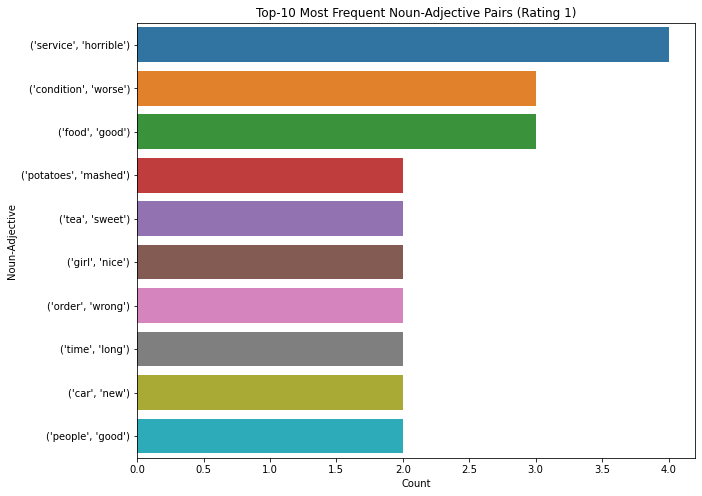

In [548]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_1["Noun-Adjective"], x=freq_dist_rating_1['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 1)")
plt.show()

Do the same for 20 reviews of ratings 2, 3, 4 and 5, respectively.

In [549]:
# Get the reviews
reviews_rating_2 = retrieveUniqueReviewsByRating(20, 2, es, index_name)
reviews_rating_3 = retrieveUniqueReviewsByRating(20, 3, es, index_name)
reviews_rating_4 = retrieveUniqueReviewsByRating(20, 4, es, index_name)
reviews_rating_5 = retrieveUniqueReviewsByRating(20, 5, es, index_name)

C:\Users\amade\anaconda3\envs\streamlit\lib\site-packages\elasticsearch\connection\base.py:200: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)



 txnvXB7JVAB3ClQ9gcsAiA Grrr I was in the middle of doing this one. Actually this is another staple in LA. Where there's a Yoshinoya Beef Bowl on Every corner. Ok if you have the Chicken bowl. Understand Chicken has the weird color...yea. It's just how it is. It's EXTRA COLOR = EXTRA FLAVOR. I just dont like to drown everything in salt. ESPECIALLY VEGGIES. Ok the beef bowl. It's normally served like that. I guess I'm used to it.
No...It's not the best of Teriyaki bowls. But then again. This isn't a teriyaki place. This is Beef Bowl....They serve shaved beef. They serve Luminescent Chicken and Veggies.... 2007-03-14 17:04:22 1.0
DOC COUNT: 1

 Lp6ulCRlSpyrg3Z6or2s9Q I had heard about the 99 cent shrimp cocktails at this place for a long time now but had never gone to try it. Well this time we made it a point to give it a try. Hubby and I both got one while lil guy was fixated on the foot long hot dog and the spam musubi.

The foot long hot dog was a great deal. For about $2.50 you get 


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAPRZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 1372

 vx4NIaEzTaHPMuN5MAbbUA The first time in had a burger and fries. They were ok. The second time had a hot dog here. It tasted ok but made me feel pretty sick later. Won't be going back. 2014-09-11 07:28:22 1.0
DOC COUNT: 401

 A8KBE0GMVgl9kbQQkCXMSg I had my knee surgery here back in January. That's the only reason in giving this crap hospital 2 stars. 
 As I sit here in Arrowhead Hospital now. I realize I will never come back here again.
 I came in the ER two days ago in excruciating pain. Everything was fine until I was admitted. 
 They had put me on an antibiotic that I think did more harm than good.  Tonight I have to say I've got the worst nurse I've ever had. I waited almost an hour and a half for pain medication.  Yes. It was due at 8pm. Didn't get it til 9:30.  Some computer problem. Ok. Understan

 6ir0MLuK6fr7-FKl_0uc-w Just paid $9 for chicken shawarma plate. Came with a salad where the lettuce was not cut into pieces less than 5" long. It was not served with any dressing. Chicken was dry. Said the plate came with tzatziki sauce, but none came with. Portion was very small for a $9 plate. Kids high chairs all were filthy. I usually review places when I really enjoy something and hate to be so negative, but almost $40 for 2 adults and 2 kids was WAY overpriced for the quality received. 2016-05-26 02:43:47 1.0
DOC COUNT: 794

 3h0Myf28suOyjB7oOjuFnw Nothing crazy good. Food is kind of bland. Orange juice is great though! The crepes are better than the pancakes in my opinion. I've had the German potato pancakes, smores pancakes and a few different crepe dishes. The Dor Stop restaurant in Dormont has better pancakes. 2016-05-27 01:52:45 1.0
DOC COUNT: 795

 8cmImOUqq9ruDti8-kmxuA Terrible experience, it took 3 hours for regular mani and pedi, the lady that took care of me acted ver


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAPRZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 1372

 1xpucURMedNrHd-egZ-Ofg Food is generally good breakfast food. Service runs very hot and cold. Hostess is not effective. Dull normal. If their service improved, would be a great breakfast place. 2018-03-21 22:28:44 1.0
DOC COUNT: 1201

 wxRMiDf-FnzZnthaRdhokg Never have we had this problem. When we got our pizza tonight it wasn't cut. Frustrated. ? 2018-03-26 03:08:34 1.0
DOC COUNT: 1202

 sHfUAgbnBCj2GpJ5iLf7vA Food was cold, The Mac&chesse we ordered was so cold at the bottom.  So the waitress took it back.  That was the only hot food. We ordered brisket an pork combo. 2018-04-04 01:25:08 1.0
DOC COUNT: 1203

 j5D7I1yLO5No_GzDrJEP4w Was unlucky to have been here during March madness. The basketball team and their fans infiltrated this hotel for a few days.  Hated being woken up at midnight to their band

3 stars because the food was yum.  But service is key and it was lacking. 2012-01-19 19:35:55 1.0
DOC COUNT: 271

 izeLn2F3PAr3U1tizPgt_g We usually come as a fam for dinner & the main dishes are pretty tasty, soup was ok & place is clean. So we've been here a few times. I haven't tried the bbq yet. Not because it looks bad but there's no covers on the meats & no one standing there to bbq so I'm skeptical. I'm sure it's just fine it's just me. We ventured in for lunch & what we thought was good for dinner was better for lunch especially the soups. The lunch soups seemed thicker & tastier. Mmmm good. As you can tell I'm a soup kind of girl. I really like the hot & sour. I tried the sushi & for a buffet it was really good. We'll back for a lunch on my next Monday off. 2012-01-23 19:51:23 1.0
DOC COUNT: 272

 yCATZoXeF89-pVcRGBGKow This place is nice. It's a high end PT's Pub. So the menu is a great Bar Food Extravaganza. This location seemed pretty dead. I don't think I have ever seen it

Overall, we had a good night. The staff were very accommodating to us when we did our christmas gift exchange, and they all said Merry Christmas! :) 2014-12-09 03:45:06 1.0
DOC COUNT: 696

 8LHCxFzB99Ho3nprEavsdA I really want to love this place. But in all honesty, the only reason I ever go here is because it's five minutes from my house.

Maybe it's me. I had heard all kinds of great things about La Unica. Maybe I set the bar too high in my head. I've been here a handful of times now and nothing has been overly impressive. Nothing has been bad... it's just all okay. One thing I will not recommend is the ceviche. Probably should've known better than to order that in a place like this, but we really wanted to try it.

I like that they bring you two different kinds of salsa. One hot, one mild. I like the cheese dip, too. They usually have drink specials of some sort. Nice spot to get down on some chips and cheap drinks. The lunch menu is reasonably priced. Tuesdays they have dollar taco

 l8s3iaWZUEsp1Y7E8aVlDA -Each 'order' of meat is literally 5 slices, so order a lot at once
-Already overpriced on weekdays and weekends, then add 2-5$ for soup base lol
-Only 2 servers have the tablet to put in orders, good luck flagging them down
-Weekday service slightly better, weekend is a nightmare
-Seating is awkward with long tables separating guests with flimsy glass/plastic, chairs completely the wrong height 2016-02-23 23:30:05 1.0
DOC COUNT: 1050

 KfkdNSsDpnKsm0YfeVsLBg My BF and sister went here about 1 year ago and meant to write the review, so here it is now. I had made reservations (thankfully - because the place was packed!! in February) and people waiting at the door. I LOVE the old-school 'fat bastard' element about this place. The service is top notch (if not slightly snooty) for sure and I'm a sucker for it. (Def. not Hipster vibe) Old wood beams, some stained glass.. as I said, tres old school. We had the table-side Caesar, which was good, but a little too much o

Only downer is the staff is rude as heck. They have eye rolling when you ask for anything to the expert level! 2017-06-26 22:51:43 1.0
DOC COUNT: 1475

 WRnsT2bQKsrA0xeSh-XRMg I was happy to see this in Terminal 4 pre-security and have been eating here for years.  My go to is he Betty Boop. One fried chicken breast and one waffle. Perfect. And at $9 is very reasonable for airport food. That sweet and salty goodness is well balanced perfection. BUT let me forewarn you. Chicken takes time to cook. So be patient. However, service here is abysmal. The female cashier on 6/26 had NO sense of urgency whatsoever. It was painful watching her complete one task at a time. I can see why people get so frustrated here. Even another employee came out to get a drink who may have been a supervisor but offered no assistance and there was a line around 12:30pm. I've never had this issue at the brick and mortar locations. She was also so unfriendly like I was doing her a favor by ordering. I probably pref

I frequented this place a lot but haven't been back for so long.  I was told the quality and portions have declined but decided to see for myself. I went on a weeknight and right away I felt the business has declined it used to be pretty full even in the evenings I think we were 1.5 hrs before closing which was at 9pm  we usually get the stir fried vermicelli with grilled chicken  and a Pho but the kitchen said that they couldn't make it the stir fried just the regular,  bummer. So all in all the portions are smaller but more important the taste was different my tastebuds were not satisfied, better and cleaner Viet placed around. 2018-11-10 15:30:01 1.0
DOC COUNT: 1900

Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAPhZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 1904

 opzP8qoGuqbVM67-v2ZD1g This restaurant gets pretty good reviews and while I was here it was super busy and there was always people waitin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DOC COUNT: 754

 7Op0QFEMpzHC3-5V3TYb9Q Was in the area and decided to try this place. From the outside, it looks like pretty much every other Hawaiian place in town. They had a mix plate special, which I ordered figuring that it would be like any other mix plate. I was really blown away! Their meat stands out from the other Hawaiian places in town and is delicious. I thought the mac salad was really good, but for some reason prefer Ohana and Ross Js mac salad. Service was great. This is by far the best hawaiian I've had in Las Vegas, and I can't wait to go back and try some other items. 2013-07-01 01:56:34 1.0
DOC COUNT: 755

 ROi3ueEIwdi0HOF0y8JPpg I love love love this place. The staff is super friendly and personable. I have always felt welcomed whenever I come. (By the people too) 

The beer is reasonably priced, and a great selection. NODA brewery has a strong presence here. 

I recommend anybody with a well behaved dog to come, or even if you don't have a dog you'll have a great

DOC COUNT: 1179

 kVLf-w3HUzHWNJEa0mtMFw Best Burger in town! If u dont mind to pay a little bit more, u get good quality food. 2014-07-01 17:19:13 1.0
DOC COUNT: 1180

 mldGJ50VVq64hTvOSpKM7A Good Kau Kau !   My only compliant and others that I know that frequent Kauai Cafe is that they should charge more money and put some salmon in their lomi lomi salmon. We all have recipes !  Please I realize if it doesn't sell you lose money, but everybody says the samething... 2014-07-02 06:15:14 1.0
DOC COUNT: 1181

 ImDeei0zb2lJyYKnc8Ygng Do NOT trust you vision to anyone else.  I've checked into other doctors for lasik, same price but NOT the same service (the others made me feel like I was dealing with a used car salesman).  Everyone is wonderful at this office.  I'm highly impressed with the service I received and still am receiving with Dr. Wellish.  I just wish I would have done this sooner!  It's been 3 months and I still am amazed with the results!    I HIGHLY RECOMMEND DR. WELLISH!!!  


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 2wkiJ7e2xMufZTsME1oB5Q Great corner market. Wide selection of beers and cigarettes, amazing Mexican food with fresh ingredients. 2015-01-31 21:30:30 1.0
DOC COUNT: 1601

 Ws1lXpZC2Yup2GAC8RLufw This was really the best dinner we've had in a long time we had decided to try something new and we weren't story the fish of the day was cooked to perfection and you know it mouthwatering sauce the environment was like a real Italian place 2015-01-31 23:12:36 1.0
DOC COUNT: 1602

 8mEhduxjW8zHD9-3lfPqwg What a remarkable renovation!

These guys have taken an old, run down, near-uninhabitable mess of a police station/firehall and revamped it to be a beerhall, bested only by Hofbrau. What impresses me the most is their ingenuity in using the materials they found in the dilapidated space to create the tables and som


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 QKxx9XEmI9ueVewc8HP33g This is the BEST mexican in Charlotte. We have tried a few. More than a few. And this is hands down the best. It is a little dive-y but thats what makes it great. Ask for Carolina. She's the most amazing, sweetest waitress. And get the salsa verde (it's free! just ask!) - its an avocado based salsa that will blow your mind. 2015-07-10 18:05:42 1.0
DOC COUNT: 2001

 gVZZoaJGrnm9yHkqiHOECA I've been here a few times, and for a municipal range, This place is amazing.
What make me want to comment was some of the low ratings others have given because the range masters were too strict, or yelled at people. I find that puzzling. Their careful oversight of the other shooters was one of the things I liked best about this place. I know that I know what I am doing with a gun , but my assumpti


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 7yyaCWgPZ6_DmJcYiTpdMw My favorite Korean restaurant around. I've spent a substantial amount of time in Korea and I'm preparing to move there permanently. This restaurant makes me feel at home, in Korea. Very authentic. The spicy pork is amazing and the Bulgogi is pretty great too! Staff if always friendly and food is always made fresh. For all you Kimchi lovers, this Kimchi is as good as it gets. Absolutely phenomenal! The only negative aspect is the parking situation. There is no near street parking so you usually have to park quite a journey away and just walk. But, it's worth it! Five stars, hands down. 2015-12-12 19:38:21 1.0
DOC COUNT: 2401

 JBKKoPq85B7vM0KqbuZX5w So excited to find a great pizza plus lots more at this restaurant in Langtree. The Grilled Caesar and wood oven pizza were delicious a


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 CnRvUSeKV3IYapwDNOAYig I had a friend introduce me to Korea Garden a little over a year ago.  And quickly fell in love.  

On this small, one way street you will find a few hidden restaurants in Oakland.  Korea Garden is hard to miss - but please don't - you won't regret it!

Pretty much every time I've gone I've gotten the Dol Sot Bi Bim Bap and on the "specials" menu are some dumplings and of course the variety of small plates.

I am a huge dumpling fan.  I've gotten dumplings at many different Asian restaurants - all of which are different.  But there is something about these dumplings.  The sauce, the crunchiness, just everything is SO good!  I highly recommend them.

Bi Bim Bap is best when you get it in the hot bowl - making it the Dol sot bi bim bap.  It warms everything in the bowl when you mix i

 f8tmL5Ze7pujjj6mvQsN1Q I no longer vape and I haven't for a few months now but decided to leave a review because of the service and quality of juice that this place provides. My personal favorite was the bomb pop but I have never have had a juice from Puff that I didn't like and have easily walked out of there with more than half of them. Awesome little shop! 2016-08-03 17:22:18 1.0
DOC COUNT: 3130

 9X__zi963j9Orq2ZRfzq5Q The most clean nails salon I've ever been to and they do a great job! They have very relaxing pedicure, definitely recommend! 2016-08-04 21:18:21 1.0
DOC COUNT: 3131

 35QSTTWFcXaUKZf9farGWQ Like an idiot, I drove my car through really high flood waters during the most recent flooding. I was worried that I ruined my car. I took it over to Kinkade's where TJ told me that they'd take a look at it. TJ personally gave me a ride home while his guys were examining my car. After they were finished, I went to pick it up. I asked one of the guys how much I owed them and he t

 TI1GZ2VzthuhVoMm7X8t9g Went there today for the 1st time with my boyfriend. Glad we checked it out. Food tasted great, good service, cool decor, and awesome pricing. We definitely plan on going back! I hope the business sticks around for a long time! 2017-01-12 21:13:01 1.0
DOC COUNT: 3587

 yMPf2EO4P7wDyZo1DsPzUw Excellent Latin American food and very good service and also good place to have some drinks after dinner. I didn't like the deserts specially the 3 Leches but the rest of the menu is fantastic. 2017-01-13 01:04:46 1.0
DOC COUNT: 3588

 pK0u6b90vHRBsHQoyHMKaA This place is the real deal!  It is my most favorite Mexican food ever!  The have a Chile Rellano burrito that is to die for.   Happy hour Mon thru Friday with all Mexican beers in a bottle just $2 bucks.   Their salsa bar is the best in the business with a variety of salsas that are all fantastic not to mention the spicy carrots and grilled onions.  The staff is friendly and helpful and the owner is there 24/7 and is on


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 pd8N4_YO9WITI-wzIhifSw This place is awesome, friendly staff and fast. 200.00 for 170 deal outstanding  great service 2017-05-24 20:41:38 1.0
DOC COUNT: 4001

 XVQoGSGXh5M44yjNNVjg9A Excellent range!

Im not sure what Patty O is crying about in their 1 star review. Maybe she should take the tin foil off of her head.
If you go during a peak time, you WILL be waiting.
If you think you are going to show up on a Saturday, pick any holiday weekend, when its 79 degrees outside, after 10am...and shoot? Not happening.
Be smart people.

Range is set up real nice. Everything runs well..from cease fires, to range going hot, to everything in between.
And don't let a range safety catch you doing something fubar..man they will chew you out!
Price is awesome, especially if you have lots of time, and ammo.
I just got my


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 lkLewQzP-qy--9TPeitCLQ Cobb Salad was great!!! Always friendly and polite here. Thanks Chic Fil a. Oh - and the Cool Wrap is also very good. Not crazy for the grilled bites as there are too few for the price. Stick to the salad and also try the wrap and you'll be in good territory. 2017-08-31 23:38:48 1.0
DOC COUNT: 4401

 q1BhYKoiwdr7Lh2kKIbGvQ Delicious sandwiches and friendly staff.  We both had the grilled chicken on a baguette. Everything was perfect. Homemade French fries. Definitely will return to try other menu items. 2017-08-31 23:58:00 1.0
DOC COUNT: 4402

 u0k8Ov3ndOOFOIxO209dyA Don't let the appearances dissuade - the food is quick, cheap and tasty.  After our ASU tour we were pretty hungry. This is near-ish to the Moxy for take out.  A chimichanga, four tacos and two drinks can be had for un

 YDUpy9RMypxOa5DDFdfctg I absolutely love this hospital! Not only close to home but, the care that everyone from front desk to Drs provide my dog is fantastic! They even call me to follow up and I so appreciate that. Thank you and the entire staff for a good experience while we dealt with our dogs surgery! 2017-12-07 21:16:22 1.0
DOC COUNT: 4791

 1iQQ52uH_3s7uJ2DcS_31Q The truck came by our work on rio salado today and I had been wanting to try them as they came up as an option for our wedding catering.

The woman taking orders was very friendly, outgoing and knowledgeable about the food.

I had the fried catfish jamburrito with hush puppies. Everything came with a very good sized portion and was delicious. I will definitely be eating here again and they are in the running for our catering needs. 2017-12-08 19:12:13 1.0
DOC COUNT: 4792

 3dBGiAgl3aPs4iJTpIZaqQ Great fast casual spot.  Good food with a little Latin flair.  Very good service and what looks like it will be a nice outdoor


Response for index: review-index
Scroll ID: FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFkM5ejRrMFQwUnM2aG52WnRKSEQ0SmcAAAAAAAAAQBZXZ1Z4dmNJQ1M0YWJLbmtOMWxSVEVn
Total Hits: 6159

 Asq7omGVByKSs2MDNOQgPA Rarely do I ever give out five stars but Dee For Dentist is now my new spot when getting my teeth cleaned every 6 months. I've been coming here for the past 3 years. The dental hygienists are very nice and knowledgeable and tell you what you need to work on if there is a problem with your teeth. Back at my old dentist I used to go to for my cleanings the dental hygienists were very rough when cleaning my teeth. I take very great care of my teeth and gums and the dental hygienists at Dee for Dentist know I do and are very gentle when cleaning your teeth. From the front desk to the assistants, hygienists, dentist, they are all very nice and I'm glad I switched over to Dee For Dentist. 2018-03-17 07:16:12 1.0
DOC COUNT: 5201

 hrV7icM_73n3Lod4mDmCNw I have been wanting to go here sinc

DOC COUNT: 5569

 gqcy_wF72VplzkrGXV2KQA TJ & his team are amazing! My fiancé and I have been coming here for a couple years and I couldn't recommend them higher. Great experience, honest feedback, and fair pricing - what's not to love :) Keep up the great work TJ! 2018-06-12 23:06:46 1.0
DOC COUNT: 5570

 gBa8UuaWpggy2OLRLl1m5w We went for happy hour and had the fabulous pork nachos and garlic wings and Masthead drafts. Austin was a terrific bartender - the best we've had there. Five star experience all around! 2018-06-13 00:22:07 1.0
DOC COUNT: 5571

 xaA5CcUT55k2VQYsjRpsNQ I only do reviews when a place really impressed me and Coaltrane's meets that criteria.  Very flavorful and diverse menu, a few good beer choices, and a little rooftop bar with a great skyline view of CLT.  Food is real quick for those late work nights when I just want a beer and a bite without cooking.  The chicken bowls are my go to but Gaucho sando is on point as well. 2018-06-13 01:41:06 1.0
DOC COUNT: 5572

 

DOC COUNT: 5994

 6CQU60ovX5pn-XznhXN68Q Fish tacos are AWESOME you need to try them. Everyone is friendly.  Ate at the bar, service was excellent. 2018-10-02 22:48:22 1.0
DOC COUNT: 5995

 P3M5zrdFK0PG_G8oX8xklA I am extremely happy I made the choice to finally get my LASIK surgery. I had been doing lots of research about it and was patiently waiting for a place that I can trust. 
I finally made my appointment to go and check it out, I was greeted by their amazing staff. They are very attentive and kind. I was greeted by Aldo as I was checked in by Bianca at the front desk. Bianca then asked me for my information and to fill out some forms. Next I went in to talk to Taylor, she sat down with me and explained to me in detail how the procedure works and what I can be expecting as we moved forward. She gave me some instructions to follow preparing me for my next appointment. I was instructed not to wear my contact lenses for 2 weeks, and to take some hydro eye pills to keep my eyes moist

In [555]:
noun_adj_pairs_rating_2 = []
noun_adj_pairs_rating_3 = []
noun_adj_pairs_rating_4 = []
noun_adj_pairs_rating_5 = []

for review in reviews_rating_2:
    noun_adj_pairs_rating_2.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_3:
    noun_adj_pairs_rating_3.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_4:
    noun_adj_pairs_rating_4.extend(find_noun_adj_pairs(review['text'], nlp))
    
for review in reviews_rating_5:
    noun_adj_pairs_rating_5.extend(find_noun_adj_pairs(review['text'], nlp))

In [559]:
freq_dist_rating_2 = FreqDist(noun_adj_pairs_rating_2).most_common(10)
freq_dist_rating_2 = list(freq_dist_rating_2)
freq_dist_rating_2 = pd.DataFrame(freq_dist_rating_2, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_3 = FreqDist(noun_adj_pairs_rating_3).most_common(10)
freq_dist_rating_3 = list(freq_dist_rating_3)
freq_dist_rating_3 = pd.DataFrame(freq_dist_rating_3, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_4 = FreqDist(noun_adj_pairs_rating_4).most_common(10)
freq_dist_rating_4 = list(freq_dist_rating_4)
freq_dist_rating_4 = pd.DataFrame(freq_dist_rating_4, columns = ["Noun-Adjective", "Count"])

freq_dist_rating_5 = FreqDist(noun_adj_pairs_rating_5).most_common(10)
freq_dist_rating_5 = list(freq_dist_rating_5)
freq_dist_rating_5 = pd.DataFrame(freq_dist_rating_5, columns = ["Noun-Adjective", "Count"])

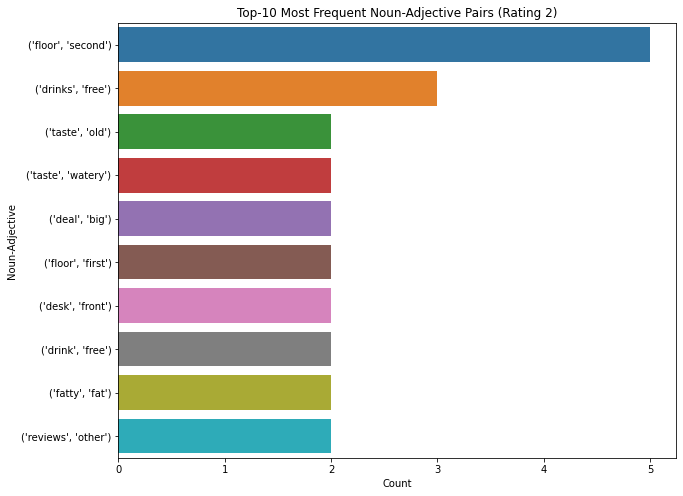

In [560]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_2["Noun-Adjective"], x=freq_dist_rating_2['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 2)")
plt.show()

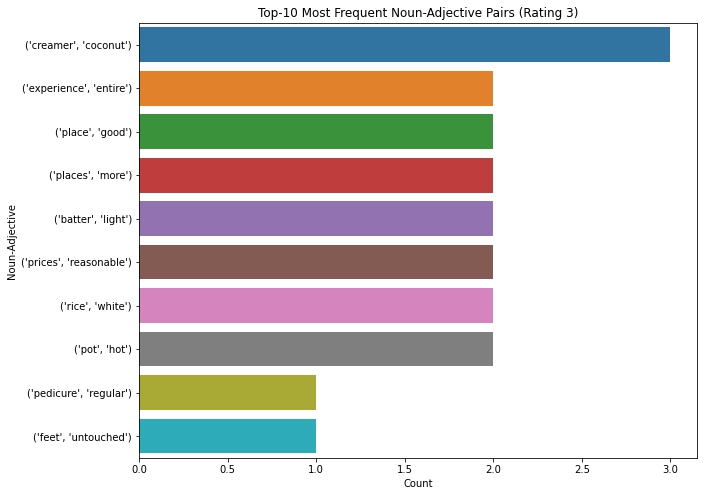

In [561]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_3["Noun-Adjective"], x=freq_dist_rating_3['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 3)")
plt.show()

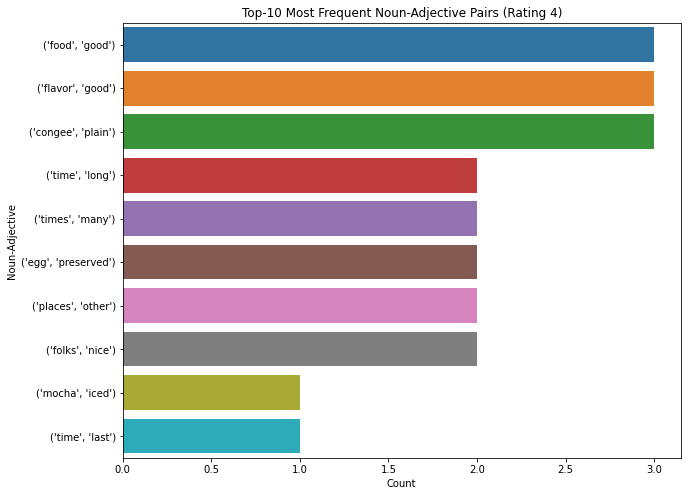

In [562]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_4["Noun-Adjective"], x=freq_dist_rating_4['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 4)")
plt.show()

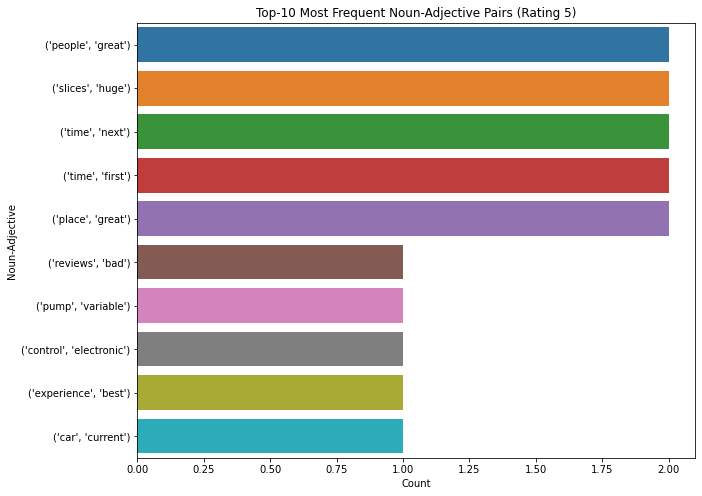

In [563]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y=freq_dist_rating_5["Noun-Adjective"], x=freq_dist_rating_5['Count'], ax=ax)
plt.title("Top-10 Most Frequent Noun-Adjective Pairs (Rating 5)")
plt.show()